NLP Sentiment Analysis using Deep Learning with Keras

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D, Conv1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [2]:
movie_reviews = pd.read_csv('cleaned_reviews.csv')

In [3]:
movie_reviews.head()

,Review,cleaned_review,stopped_review,final_review,Freshness
0,"Manakamana doesn't answer any questions, yet ...",manakamana doesnt answer any questions yet mak...,manakamana doesnt answer questions yet makes p...,manakamana doesnt answer question yet make poi...,1
1,Wilfully offensive and powered by a chest-thu...,wilfully offensive and powered by a chestthump...,wilfully offensive powered chestthumping machi...,wil offens power chestthump machismo good clea...,1
2,It would be difficult to imagine material mor...,it would be difficult to imagine material more...,would difficult imagine material wrong spade l...,would difficult imagin materi wrong spade lost...,0
3,Despite the gusto its star brings to the role...,despite the gusto its star brings to the role ...,despite gusto star brings role hard ride shotg...,despit gusto star bring role hard ride shotgun...,0
4,If there was a good idea at the core of this ...,if there was a good idea at the core of this f...,good idea core film buried unsightly pile flat...,good idea core film buri unsightli pile flatul...,0


In [4]:
X = movie_reviews['stopped_review'].astype(str)
#X_lemma = movie_reviews['final_review']
y = movie_reviews['Freshness']

In [5]:
X[400]

'guy ritchies take arthurian myth misbegotten mashup swordandsorcery action fantasy geezersonamission caper booming cgi lairy banter bish bash bosh'

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [7]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [8]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 30

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [9]:
vocab_size

113209

In [10]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('C:/Users/kelvi/Desktop/Capstone/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [11]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [12]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           11320900  
_________________________________________________________________
flatten_1 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3001      
Total params: 11,323,901
Trainable params: 3,001
Non-trainable params: 11,320,900
_________________________________________________________________
None


In [14]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 257280 samples, validate on 64320 samples
Epoch 1/10
257280/257280 [==============================] - 5s 19us/step - loss: 0.6068 - acc: 0.6708 - val_loss: 0.5968 - val_acc: 0.6795
Epoch 2/10
257280/257280 [==============================] - 5s 18us/step - loss: 0.5922 - acc: 0.6853 - val_loss: 0.5969 - val_acc: 0.6803
Epoch 3/10
257280/257280 [==============================] - 5s 18us/step - loss: 0.5909 - acc: 0.6865 - val_loss: 0.5966 - val_acc: 0.6818
Epoch 4/10
257280/257280 [==============================] - 5s 18us/step - loss: 0.5905 - acc: 0.6868 - val_loss: 0.5951 - val_acc: 0.6833
Epoch 5/10
257280/257280 [==============================] - 5s 18us/step - loss: 0.5901 - acc: 0.6867 - val_loss: 0.5947 - val_acc: 0.6842
Epoch 6/10
257280/257280 [==============================] - 5s 18us/step - loss: 0.5897 - acc: 0.6874 - val_loss: 0.5987 - val_acc: 0.6808
Epoch 7/10
257280/257280 [==============================] - 5s 18us/step - loss: 0.5895 - acc: 0.6877 - val_loss: 0

In [15]:
score = model.evaluate(X_test, y_test, verbose=1)

158400/158400 [==============================] - 3s 20us/step


In [16]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5932413291870946
Test Accuracy: 0.6853408813476562


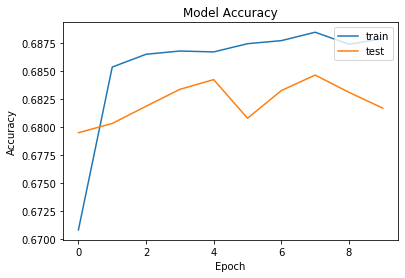

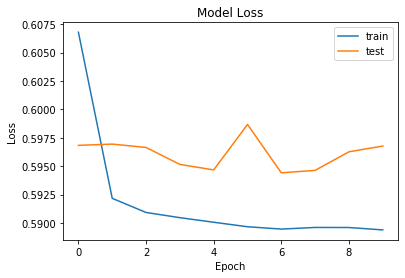

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [18]:
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [19]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30, 100)           11320900  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 26, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 11,385,157
Trainable params: 64,257
Non-trainable params: 11,320,900
_________________________________________________________________
None


In [20]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 257280 samples, validate on 64320 samples
Epoch 1/20
257280/257280 [==============================] - 28s 110us/step - loss: 0.5427 - acc: 0.7207 - val_loss: 0.5133 - val_acc: 0.7434
Epoch 2/20
257280/257280 [==============================] - 28s 110us/step - loss: 0.4823 - acc: 0.7663 - val_loss: 0.4971 - val_acc: 0.7559
Epoch 3/20
257280/257280 [==============================] - 28s 109us/step - loss: 0.4456 - acc: 0.7905 - val_loss: 0.4891 - val_acc: 0.7636
Epoch 4/20
257280/257280 [==============================] - 28s 109us/step - loss: 0.4165 - acc: 0.8090 - val_loss: 0.4887 - val_acc: 0.7682
Epoch 5/20
257280/257280 [==============================] - 28s 110us/step - loss: 0.3942 - acc: 0.8223 - val_loss: 0.5560 - val_acc: 0.7390
Epoch 6/20
257280/257280 [==============================] - 28s 111us/step - loss: 0.3754 - acc: 0.8323 - val_loss: 0.5010 - val_acc: 0.7702
Epoch 7/20
257280/257280 [==============================] - 29s 112us/step - loss: 0.3600 - acc: 0.8414

In [21]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6166203731388756
Test Accuracy: 0.7780176997184753


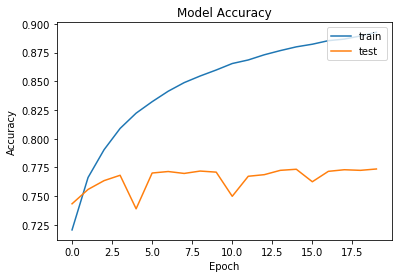

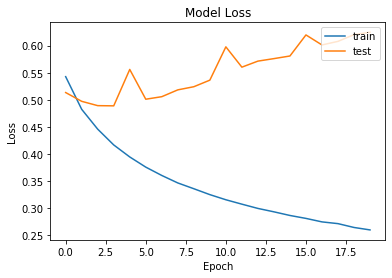

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [29]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(256))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [30]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 30, 100)           11320900  
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 11,686,725
Trainable params: 365,825
Non-trainable params: 11,320,900
_________________________________________________________________
None


In [31]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

Train on 257280 samples, validate on 64320 samples
Epoch 1/20
257280/257280 [==============================] - 270s 1ms/step - loss: 0.5459 - acc: 0.7190 - val_loss: 0.5176 - val_acc: 0.7390
Epoch 2/20
257280/257280 [==============================] - 263s 1ms/step - loss: 0.4845 - acc: 0.7633 - val_loss: 0.4775 - val_acc: 0.7706
Epoch 3/20
257280/257280 [==============================] - 265s 1ms/step - loss: 0.4495 - acc: 0.7847 - val_loss: 0.4563 - val_acc: 0.7819
Epoch 4/20
257280/257280 [==============================] - 267s 1ms/step - loss: 0.4159 - acc: 0.8064 - val_loss: 0.4433 - val_acc: 0.7904
Epoch 5/20
257280/257280 [==============================] - 268s 1ms/step - loss: 0.3787 - acc: 0.8273 - val_loss: 0.4440 - val_acc: 0.7905
Epoch 6/20
257280/257280 [==============================] - 270s 1ms/step - loss: 0.3399 - acc: 0.8497 - val_loss: 0.4413 - val_acc: 0.8027
Epoch 7/20
257280/257280 [==============================] - 270s 1ms/step - loss: 0.3004 - acc: 0.8714 - val_

In [32]:
score = model.evaluate(X_test, y_test, verbose=1)

158400/158400 [==============================] - 99s 624us/step


In [33]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.7350656364589102
Test Accuracy: 0.8174558281898499


Test Accuracy: 0.8174558281898499


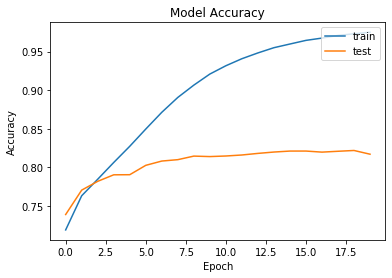

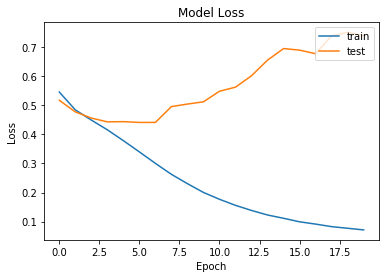

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()